# Feature Engineering

### Purpose

Feature engineering involves creating new features or modifying existing ones to improve the performance of machine learning models. It aims to extract more meaningful information from raw data, making it more suitable for analysis and modeling.

### Importance

1. **Improves Model Performance**: Well-engineered features can significantly enhance the accuracy and predictive power of machine learning models.
2. **Reduces Overfitting**: By creating more informative features, models can generalize better to unseen data, reducing the risk of overfitting.
3. **Enhances Interpretability**: New features can provide better insights into the data, making the model's predictions more understandable and actionable.
4. **Handles Data Issues**: Feature engineering can address issues like missing values, noise, and variability in the data, leading to cleaner and more robust models.

### Techniques in Feature Engineering

1. **Transformation**: Applying mathematical transformations like log, square root, or exponential to features to stabilize variance or meet assumptions of algorithms.
2. **Encoding**: Converting categorical features into numerical values using techniques like label encoding, one-hot encoding, and target encoding.
3. **Binning**: Grouping continuous variables into discrete bins to reduce the effect of noise and outliers.
4. **Interaction Features**: Creating new features by combining existing ones, capturing interactions between variables that may improve model performance.
5. **Aggregation**: Summarizing data at a higher level of granularity, such as mean, sum, or count of a feature within a group.

### Potential Side Effects

1. **Increased Complexity**: Adding more features can make models more complex and harder to interpret.
2. **Overfitting**: Creating too many features, especially from small datasets, can lead to models that fit the training data too closely and perform poorly on new data.
3. **Dimensionality Issues**: High-dimensional feature spaces can lead to the curse of dimensionality, where the model's performance degrades due to sparsity of data points.
4. **Computational Cost**: More features can increase the computational cost of training and deploying models, requiring more resources and time.
5. **Irrelevant Features**: Adding irrelevant or redundant features can introduce noise into the model, potentially degrading performance.

### Summary

Feature engineering is a critical step in the machine learning pipeline that can greatly influence model performance and interpretability. However, it should be done thoughtfully to avoid potential pitfalls like overfitting, increased complxity, and computational costs.


In [1135]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Task 1: Feature Selection

### Purpose

Feature selection is the process of identifying and selecting the most relevant features from a dataset for use in model building. The goal is to improve model performance by eliminating irrelevant, redundant, or noisy features.

### Importance

1. **Improves Model Performance**: Reducing the number of features can lead to simpler models that generalize better to new data, improving accuracy and reducing overfitting.
2. **Reduces Overfitting**: By removing irrelevant features, models are less likely to fit noise in the training data, which can enhance their performance on unseen data.
3. **Enhances Interpretability**: Fewer features make models easier to understand and interpret, providing clearer insights into the relationships within the data.
4. **Reduces Computational Cost**: Fewer features mean less computational resources are needed for training and prediction, making models more efficient.

### Techniques in Feature Selection

1. **Filter Methods**: These methods evaluate the relevance of each feature based on statistical measures, independent of the learning algorithm.
   - Examples: Pearson correlation, chi-square test, mutual information.

2. **Wrapper Methods**: These methods evaluate the performance of a subset of features using a specific machine learning algorithm.
   - Examples: Recursive Feature Elimination (RFE), Forward Selection, Backward Elimination.

3. **Embedded Methods**: These methods perform feature selection during the model training process and are specific to the learning algorithm.
   - Examples: LASSO (L1 regularization), Ridge (L2 regularization), Tree-based methods (feature importance scores).

4. **Hybrid Methods**: These methods combine the strengths of filter, wrapper, and embedded methods to select the most relevant features.

### Potential Side Effects

1. **Loss of Information**: Removing features might lead to loss of important information, especially if the feature selection process is not thorough.
2. **Increased Complexity**: Wrapper and embedded methods can be computationally intensive and time-consuming, especially with large datasets.
3. **Bias in Selection**: The choice of feature selection method can introduce bias, potentially leading to the exclusion of relevant features.
4. **Model Dependency**: Some feature selection techniques are model-dependent, and the selected features might not perform well with different algorithms.

### Summary

Feature selection is a critical step in the machine learning pipeline that helps improve model performance, interpretability, and efficiency by identifying and retaining the most relevant features. However, it is essential to carefully choose the appropriate technique and validate the selected fetures to avoid potential pitfalls.


# Loading the dataset

In [1198]:
df = sns.load_dataset('titanic')

# Titanic Dataset Analysis

The human brain is always optimal, as it can comprehend complex contexts beyond mere numbers. However, machines can learn patterns from numerical data. In this analysis, we are focusing on the Titanic dataset with the goal of predicting whether a passenger survived the disaster.

## Target and Features

The target label in our dataset is `survived`. Let’s examine the features (also known as labels) in the dataset:

1. **Survived**: This is our target variable.
2. **Alive**: This feature is perfectly aligned with the target variable, making it an excellent feature for prediction.
3. **Pclass**: This feature indicates the class of the passenger (1st, 2nd, or 3rd). While not the best, it can provide useful information.
4. **SibSp**: Number of siblings/spouses aboard. This feature has limited predictive power.
5. **Parch**: Number of parents/children aboard. Similar to SibSp, it is not a key feature.
6. **Who**: Defines whether the passenger is male, female, or child. It’s not the best feature but still provides some insights.
7. **Adult_male**: Indicates if the passenger is an adult male. Not a primary feature.
8. **Embark_town**: The town where the passenger embarked. Not a crucial feature.
9. **Alone**: Indicates if the passenger was alone. Not a significant feature.

## Potentially Good Features

1. **Sex**: This could be a significant feature as there might have been a bias in rescuing passengers based on gender.
2. **Fare**: The fare paid by the passenger can indicate their socioeconomic status, which might have influenced their chances of survival.
3. **Embarked**: Combined with class, this feature can be important as the priority during the incident was likely given to wealthy passengers in higher classes.
4. **Deck**: This feature is crucial because the deck location influenced survival rates. When the ship was damaged and water began filling, certain decks were closed off, trapping passengers and crew.

By understanding the incident, we can identify good features through feature engineering, enhancing the predictive power of our model.


In [1140]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Finding the null_values in the dataset
To get the "correlation" of the features, our data should be clean so that the "correlation" will not be affected.
- Here we get the list of columns, which have null_values

In [1201]:
null_values = [cols for cols in df.columns if df[cols].isna().sum() > 0]
null_values

['age', 'embarked', 'deck', 'embark_town']

- Now let's remove the null_values, We should not remove the null_values, rather we should replace the null_values with the mean if the label is in numerical and with the most occuring value if the label is categorical.
- See the null_values are replaced by ".mode()" which will take the most occuring value inn the dataset

In [1204]:
for i in df[null_values]:
    df[i] = df[i].fillna(df[i].mode()[0])
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

## Correlation Between Features and Target

To find the correlation between features and the target variable in the Titanic dataset, we can use the `corr()` function. However, we encounter the following error:
This error occurs because `corr()` requires numerical input, and our dataset contains categorical data represented as strings. Therefore, we need to transform these categorical data points into numerical data points. This process is part of feature extraction.

### Discretization

Discretization involves taking a set of data values and logically grouping them into bins (or buckets). This transformation converts continuous or categorical data into discrete numerical values.

### Steps for Discretization

1. **Identify Categorical Features**: Determine which features in the dataset are categorical (e.g., `Sex`, `Embarked`).

2. **Transform Categorical Data**: Convert these categorical features into numerical values using techniques like:
    - **Label Encoding**: Assign a unique integer to each category.
    - **One-Hot Encoding**: Create binary columns for each category.

3. **Apply Correlation Function**: Once the categorical data is transformed, use the `corr()` function to find the correlation between features and the target variable.

By following these steps, we can successfully compute the correlation and identify which features are most relevant to predicting whether a passenger survived.




In [1207]:
df.corr()

ValueError: could not convert string to float: 'male'

- We got an error, because the "corr()" excepts the numerical feature values, but our data also containn the catogericol values, let's find the categorical values in the dataset so that our "corr()" can work properly.

- See we have some featurs in categorical type.

In [1211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


# finding the the categorical columnns

In [1213]:
categorical_columnns  = [cols for cols in df.columns if df[cols].dtype == "object"]
categorical_columnns

['sex', 'embarked', 'who', 'embark_town', 'alive']

# Error Resolved

We resolved the error by converting the `Sex` feature from categorical to numerical values, where `male` is turned into 1 and `female` into 0. This transformation resolved the initial error. However, `Sex` was not the only categorical label in our dataset. Other categorical features will also cause similar errors if not converted.

## Transforming All Categorical Labels

To avoid errors and ensure accurate correlation calculations, we need to convert all categorical labels into numerical values. Here are the steps to achieve this:

1. **Identify Categorical Features**: List all the categorical features in the dataset (e.g., `Embarked`, `Deck`, `Pclass`, etc.).

By converting all categorical labels into numerical values, we can use the `corr()` function without encountering errors, allowing us to analyze the correlations between features and the target variable accurately.


In [1216]:
df["sex"] = df["sex"].map({"male": 1, "female": 0})
df["embarked"] = df["embarked"].map({"S": 1, "C": 2, "Q": 3})
df["class"] = df["class"].map({'Third' : 1, 'First':2, 'Second':3})
df["who"] = df["who"].map({'man':1, 'woman':2, 'child':3})
df["adult_male"] = df["adult_male"].map({True:1, False:2})
df["deck"] = df["deck"].map({'C':1, 'E':2, 'G':3, 'D':4, 'A':5, 'B':6, 'F':7})
df["embark_town"] = df["embark_town"].map({'Southampton':1, 'Cherbourg':2, 'Queenstown':3})
df["alive"] = df["alive"].map({'yes':1, 'no':2})
df["alone"] = df["alone"].map({True:1, False:2})
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,1,1,1,1,1,1,2,2
1,1,1,0,38.0,1,0,71.2833,2,2,2,2,1,2,1,2
2,1,3,0,26.0,0,0,7.9250,1,1,2,2,1,1,1,1
3,1,1,0,35.0,1,0,53.1000,1,2,2,2,1,1,1,2
4,0,3,1,35.0,0,0,8.0500,1,1,1,1,1,1,2,1


# Applying the `corr()` After Resolving the Error

We have successfully transformed our categorical features into numerical values, ensuring that the `corr()` function will work without errors. Now, let's apply the `corr()` function to our dataset and interpret the results to identify the best features for our target variable. This process is a part of feature engineering.

## Steps to Apply `corr()` and Interpret Results

1. **Apply the `corr()` Function**: Use the `corr()` function on the dataset to calculate the correlation matrix.

2. **Analyze the Correlation Matrix**: Look for features with high correlation values with the target variable. Positive values indicate a direct relationship, while negative values indicate an inverse relationship.

3. **Identify the Best Features**: Features with higher absolute correlation values (either positive or negative) with the target variable are considered the best features. These features are more likely to have a significant impact on predicting the target variable.

By interpreting the `corr()` results, we can identify the most relevant features and proceed with feature engineering to improve our preditive model.


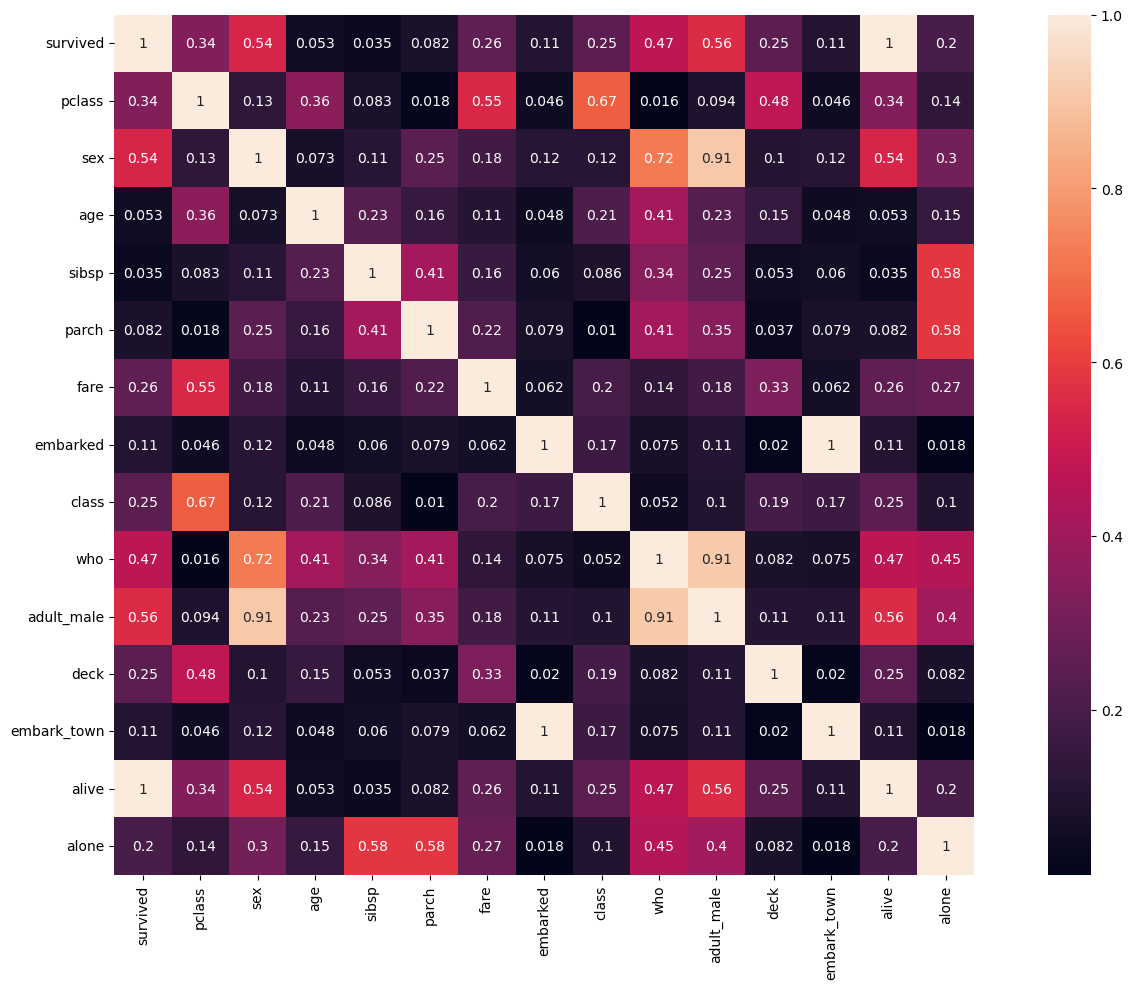

In [1218]:
corr = df.corr().abs()
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot=True, square = True)
plt.tight_layout()
plt.show()

# Selection of features
- now we've done the "corr()", let's just select the feature which is of high correlation with each other. 
- it'll help our model to do prediction more effeicently
- let's set that we're looking for the features whose correlation with the target is more that 0.2, it's our threshold. we set it.
- so our features are reduced, but these are the best features that are participating to the target values. other features are not that necessary thry might just increasing our computation power

In [1220]:
# target = "survi
feature_selection = [cols for cols in corr.columns if cols != "survived" and abs(corr[cols]["survived"] >= 0.5)]
print(f" Best Features with correlation more than 0.3: {feature_selection}\n")
df[feature_selection].head()

 Best Features with correlation more than 0.3: ['sex', 'adult_male', 'alive']



,sex,adult_male,alive
0,1,1,2
1,0,2,1
2,0,2,1
3,0,2,1
4,1,1,2


## Understanding Correlation and R-Squared in R

In R, the `corr()` function is commonly used to calculate the correlation between two variables, say X and Y. The output of this function ranges from -1 to 1, indicating the strength and direction of the relationship between the variables. For instance, a correlation coefficient of 0.5 suggests a moderate positive relationship, meaning that as X increases, Y tends to increase as well. However, it’s important to note that this value does not imply that the variables are 50% related; it simply reflects the strength of the association.

### The Limitations of Correlation

One limitation of using correlation is that it only measures linear relationships and may not capture more complex interactions between variables. Furthermore, correlation does not imply causation, meaning that a correlation between X and Y does not indicate that one variable directly affects the other.

### Introduction to R-Squared

To provide a more intuitive understanding of the relationship between variables, we often use R-Squared (R²). R-Squared is simply the square of the correlation coefficient. For example, if the correlation between X and Y is 0.5, the R-Squared value would be 0.25 (or 25%). This indicates that 25% of the variability in the target variable can be explained by the independent variable, making it easier to interpret the strength of the relationship.

### Summary

| Measure       | Interpretation                                      |
|---------------|----------------------------------------------------|
| Correlation (r) | Ranges from -1 to 1, indicates strength & direction |
| R-Squared (R²) | Ranges from 0 to 1, indicates percentage of explained variability |

In summary, while correlation provides valuable insights into the relationship between variables, R-Squared offers a more straightforward interpretation of how much of the variance in the target variable can be explained by the predictor variable.

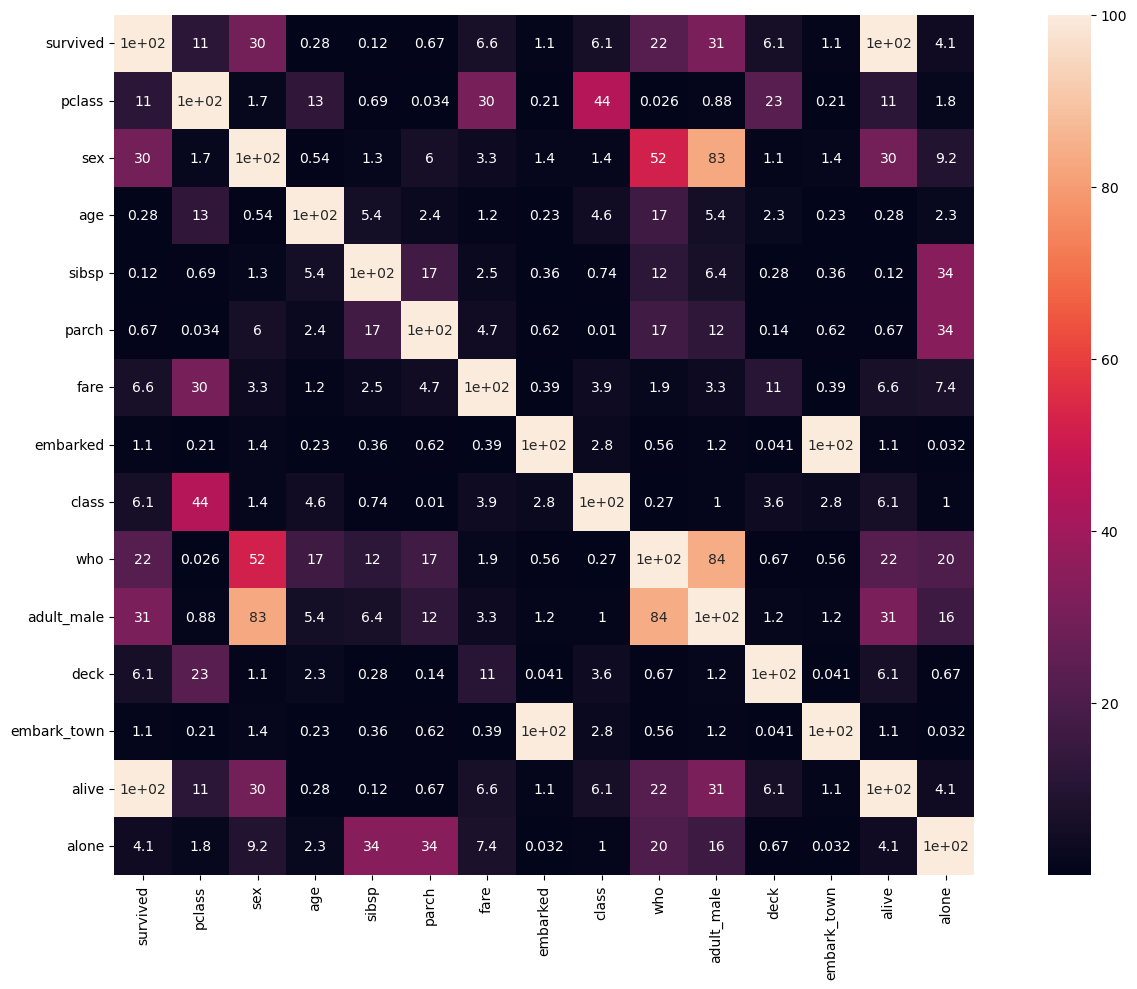

In [1168]:
r_squared = (corr**2)*100
plt.figure(figsize = (15,10))
sns.heatmap(r_squared, annot=True, square = True)
plt.tight_layout()
plt.show()

In [1170]:
feature_selection = [cols for cols in r_squared.columns if cols != "survived" and abs(r_squared[cols]["survived"] >= 10)]
print(f" Best Features with correlation more than 10% Relation: {feature_selection}\n")
df[feature_selection].head()

 Best Features with correlation more than 10% Relation: ['pclass', 'sex', 'who', 'adult_male', 'alive']



,pclass,sex,who,adult_male,alive
0,3,1,1,1,2
1,1,0,2,2,1
2,3,0,2,2,1
3,1,0,2,2,1
4,3,1,1,1,2


## Documentation: Why R and R-Squared are Used

### Introduction

In statistical analysis, understanding the relationship between two variables is crucial. Two commonly used metrics for this purpose are the correlation coefficient (R) and R-Squared (R²).

### R Method

The R method calculates the simple correlation between two variables, providing a coefficient that indicates how closely they are related. The value of R ranges from -1 to 1:

- **R = 1**: Perfect positive correlation
- **R = -1**: Perfect negative correlation
- **R = 0**: No correlation

While R is useful for understanding the strength and direction of a linear relationship, it has its limitations. One major drawback is that it only indicates how closely related the variables are, without providing a clear interpretation of their relationship's significance.

### R-Squared

To enhance the understanding of the relationship between variables, R-Squared (R²) is used. R-Squared is simply the square of the correlation coefficient (R) and provides a more intuitive measure of the relationship:

- **Interpretation**: R-Squared represents the proportion of variance in the dependent variable that can be explained by the independent variable. For example, an R-Squared value of 0.25 indicates that 25% of the variance in the target variable is explained by the predictor variable.

### Advantages of R-Squared

R-Squared is preferred in many analyses because it offers a direct interpretation of the relationship between two variables, making it easier to understand the impact of one variable on another. This clarity is particularly useful in regression analysis and model evaluation.

### Summary Table

| Metric       | Description                                        | Range        |
|--------------|--------------------------------------------------|--------------|
| R            | Correlation coefficient showing relationship strength | -1 to 1      |
| R-Squared    | Proportion of variance explained by the independent variable | 0 to 1       |

### Conclusion

In summary, while the R method provides a fundamental understanding of the relationship between two variables, R-Squared serves as a more refined metric that facilitates easier interpretation and clearer insights into the relationship dynamics.


================================================================================================================

# Task 2: Feature Transformation

### Purpose

Feature transformation involves modifying existing features to improve the performance of machine learning models. The goal is to make the data more suitable for modeling by addressing issues like skewness, non-linearity, and scale differences.

### Importance

1. **Improves Model Performance**: Transformed features can lead to better model accuracy and robustness by making the data more suitable for the chosen algorithm.
2. **Reduces Skewness**: Transformations can address skewed distributions, making features more normally distributed and improving the performance of algorithms that assume normality.
3. **Handles Non-linearity**: Applying non-linear transformations can help linear models capture non-linear relationships in the data.
4. **Standardizes Scale**: Transformations like normalization and standardization ensure features are on a similar scale, which is important for distance-based algorithms.

### Techniques in Feature Transformation

1. **Log Transformation**: Applies the natural logarithm to features, reducing right-skewness and handling multiplicative relationships.
   - Formula: \( \text{Transformed v\lue} = \log(x) \)

2. **Square Root Transformation**: Applies the square root to features, reducing right-skewness and handling positive values.
   - Formula: \( \text{Transformed value} = \sqrt{x} \)

3. **Power Transformation**: Applies a power function to features, which can stabilize variance and make the data more normally distributed.
   - Examples: Box-Cox transformation, Yeo-Johnson transformation.

4. **Normalization**: Scales features to a [0, 1] range, making them comparable.
   - Formula: \( \text{Normalized value} = \frac{(x - \text{min}(X))}{(\text{max}(X) - \text{min}(X))} \)

5. **Standardization**: Scales features to have zero mean and unit variance.
   - Formula: \( \text{Standardized value} = \frac{(x - \mu)}{\sigma} \)

6. **Binning**: Converts continuous features into categorical bins, which can reduce the impact of outliers.
   - Example: Age groups like "child", "adult", "senior".

### Potential Side Effects

1. **Loss of Interpretability**: Transformed features might be harder to interpret compared to the original features.
2. **Information Loss**: Certain transformations, like binning, can lead to loss of information and granularity.
3. **Inappropriate Transformations**: Applying the wrong transformation can distort the data and negatively impact model performance.
4. **Computational Cost**: Some transformations can be computationally expensive, especially with large datasets.

### Summary

Feature transformation is a crucial step in the machine learning pipeline that improves the suitability of data for modeling. By applying appropriate transformations, we can enhance model performance, address issues like skewness and scale differences, and capture non-linear relationships. However, it is essential to choose transformatins carefully to avoid potential pitfalls.


In [1233]:
df = sns.load_dataset('titanic')
null_values = [cols for cols in df.columns if df[cols].isna().sum() > 0]
for i in df[null_values]:
    df[i] = df[i].fillna(df[i].mode()[0])
categorical_columnns  = [cols for cols in df.columns if df[cols].dtype == "object"]
df["sex"] = df["sex"].map({"male": 1, "female": 0})
df["embarked"] = df["embarked"].map({"S": 1, "C": 2, "Q": 3})
df["class"] = df["class"].map({'Third' : 1, 'First':2, 'Second':3})
df["who"] = df["who"].map({'man':1, 'woman':2, 'child':3})
df["adult_male"] = df["adult_male"].map({True:1, False:2})
df["deck"] = df["deck"].map({'C':1, 'E':2, 'G':3, 'D':4, 'A':5, 'B':6, 'F':7})
df["embark_town"] = df["embark_town"].map({'Southampton':1, 'Cherbourg':2, 'Queenstown':3})
df["alive"] = df["alive"].map({'yes':1, 'no':2})
df["alone"] = df["alone"].map({True:1, False:2})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    int64   
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    int64   
 8   class        891 non-null    category
 9   who          891 non-null    int64   
 10  adult_male   891 non-null    int64   
 11  deck         891 non-null    category
 12  embark_town  891 non-null    int64   
 13  alive        891 non-null    int64   
 14  alone        891 non-null    int64   
dtypes: category(2), float64(2), int64(11)
memory usage: 92.8 KB


## Log Transformation for Data Normalization

### Introduction to Log Transformation

Log transformation is a powerful technique used to normalize data, helping to achieve a normal distribution. Many statistical models and algorithms perform better when the input data follows a normal distribution, as it ensures that the probabilities are represented accurately based on the values.

### Importance of Normal Distribution

In a normal distribution:
- The data is symmetrically distributed around the mean.
- It allows for better interpretability and reliability of statistical analyses and machine learning models.

### Applying Log Transformation to Our Dataset

In our dataset, we have several variables to consider:
- **Numerical Variables**: Age and Fare
- **Categorical Variables**: Other features that we need to convert to numerical format

### Steps for Transformation

1. **Convert Categorical Variables**: First, we need to convert the categorical variables into numerical formats using techniques such as one-hot encoding or label encoding.

2. **Log Transformation**: After converting the categorical variables, we will apply log transformation to the numerical variables (Age and Fare) to stabilize variance and make the data more normally distributed.

### Expected Impact on Feature Extraction

By applying log transformation, we can expect several benefits for feature extraction:
- Reduced skewness in the data, leading to a more balanced distribution.
- Enhanced relationships between features, which may improve the performance of machine learning models.
- Greater interpretability of the transformed features.

### Summary of Steps

| Step                        | Description                                      |
|-----------------------------|--------------------------------------------------|
| Convert Categorical Variables | Transform categorical data into numerical format |
| Apply Log Transformation      | Normalize numerical variables (Age, Fare)        |
| Analyze Effects              | Evaluate how transformation impacts feature extraction |

By following these steps, we can enhance our dataset's quality and improve the performance of subsequent modeling processes.


In [1224]:
df = sns.load_dataset('titanic')
null_values = [cols for cols in df.columns if df[cols].isna().sum() > 0]
for i in df[null_values]:
    df[i] = df[i].fillna(df[i].mode()[0])
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [1226]:
df.drop("survived", axis = 1, inplace = True) #survived is the target
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True


- Let's apply the Log Transformer to the labels

In [1235]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,1,1,1,1,1,1,2,2
1,1,1,0,38.0,1,0,71.2833,2,2,2,2,1,2,1,2
2,1,3,0,26.0,0,0,7.9250,1,1,2,2,1,1,1,1
3,1,1,0,35.0,1,0,53.1000,1,2,2,2,1,1,1,2
4,0,3,1,35.0,0,0,8.0500,1,1,1,1,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,1,3,1,1,1,1,2,1
887,1,1,0,19.0,0,0,30.0000,1,2,2,2,6,1,1,1
888,0,3,0,24.0,1,2,23.4500,1,1,2,2,1,1,2,2
889,1,1,1,26.0,0,0,30.0000,2,2,1,1,1,2,1,1


In [1237]:
log_df = np.log(df)

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


TypeError: Object with dtype category cannot perform the numpy op log

## Handling Category Dtype Errors in the Dataset

### Issue Encountered

While applying log transformation, we encountered an error due to the presence of categorical data types in the dataset. This error arises because log transformation can only be applied to numerical values, not categorical ones.

### Solution: Converting Categorical Variables

To resolve this issue, we can convert the categorical variables into numerical format. One effective method is to use the `cat.codes` attribute, which assigns integer codes to each category in a categorical column.

### Steps to Resolve the Error

1. **Identify Categorical Variables**: Determine which columns in the dataset are categorical.

2. **Convert to Categorical Dtype**: If not already done, convert these columns to the categorical dtype.

3. **Assign Integer Codes**: Use `cat.codes` to transform the categorical variables into integer codes.

4. **Proceed with Log Transformation**: Once the categorical variables are converted, we can safely apply log transformation to the numerical columns.

In [1239]:
df['class'] = df['class'].cat.codes
df['deck'] = df['deck'].cat.codes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    int64  
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    int64  
 8   class        891 non-null    int8   
 9   who          891 non-null    int64  
 10  adult_male   891 non-null    int64  
 11  deck         891 non-null    int8   
 12  embark_town  891 non-null    int64  
 13  alive        891 non-null    int64  
 14  alone        891 non-null    int64  
dtypes: float64(2), int64(11), int8(2)
memory usage: 92.4 KB


## Impact of Log Transformation on Feature Relationships

### Effect of Log Transformation

After applying log transformation, we observe that the values of our features have significantly changed. This transformation has the power to stabilize variance and make the distribution more normal, which can reveal different relationships among the variables.

### Expected Outcomes

1. **Log Relationships**: The resulting correlations will reflect the logarithmic relationships between the features, which can provide more meaningful insights for modeling.

In [1242]:
df_log = np.log(df)
df_log.head()

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,-inf,1.098612,0.0,3.091042,0.0,-inf,1.981001,0.000000,0.693359,0.000000,0.000000,0.693359,0.000000,0.693147,0.693147
1,0.0,0.000000,-inf,3.637586,0.0,-inf,4.266662,0.693147,-inf,0.693147,0.693147,0.693359,0.693147,0.000000,0.693147
2,0.0,1.098612,-inf,3.258097,-inf,-inf,2.070022,0.000000,0.693359,0.693147,0.693147,0.693359,0.000000,0.000000,0.000000
3,0.0,0.000000,-inf,3.555348,0.0,-inf,3.972177,0.000000,-inf,0.693147,0.693147,0.693359,0.000000,0.000000,0.693147
4,-inf,1.098612,0.0,3.555348,-inf,-inf,2.085672,0.000000,0.693359,0.000000,0.000000,0.693359,0.000000,0.693147,0.000000


# Normalization

## Normalization of Data

### What is Normalization?

Normalization is a technique used to scale values to a specific range, typically between 0 and 1. This helps standardize the dataset and ensures that each feature contributes equally to the analysis. Normalization is particularly important for algorithms that rely on distance metrics, such as k-nearest neighbors and gradient descent-based methods.

### Normalization Formula

The formula for normalizat
i$$
\text{Normalized\_value} = \frac{x - \min(X)}{\max(X) - \min(X)}
$$
in}(X))}
\]

Where:
- \( x \) is the original value.
- \( \text{min}(X) \) is the minimum value of the feature.
- \( \text{max}(X) \) is the maximum value of the feature.

### Applying Normalization to Our Dataset

In our dataset, we will normalize the variables "pclass" and "fare." By applying normalization, we can bring these features into a consistent range, which can enhance model performan

In [1246]:
df = sns.load_dataset('titanic')
null_values = [cols for cols in df.columns if df[cols].isna().sum() > 0]
for i in df[null_values]:
    df[i] = df[i].fillna(df[i].mode()[0])
categorical_columnns  = [cols for cols in df.columns if df[cols].dtype == "object"]
df["sex"] = df["sex"].map({"male": 1, "female": 0})
df["embarked"] = df["embarked"].map({"S": 1, "C": 2, "Q": 3})
df["class"] = df["class"].map({'Third' : 1, 'First':2, 'Second':3})
df["who"] = df["who"].map({'man':1, 'woman':2, 'child':3})
df["adult_male"] = df["adult_male"].map({True:1, False:2})
df["deck"] = df["deck"].map({'C':1, 'E':2, 'G':3, 'D':4, 'A':5, 'B':6, 'F':7})
df["embark_town"] = df["embark_town"].map({'Southampton':1, 'Cherbourg':2, 'Queenstown':3})
df["alive"] = df["alive"].map({'yes':1, 'no':2})
df["alone"] = df["alone"].map({True:1, False:2})
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,1,1,1,1,1,1,2,2
1,1,1,0,38.0,1,0,71.2833,2,2,2,2,1,2,1,2
2,1,3,0,26.0,0,0,7.9250,1,1,2,2,1,1,1,1
3,1,1,0,35.0,1,0,53.1000,1,2,2,2,1,1,1,2
4,0,3,1,35.0,0,0,8.0500,1,1,1,1,1,1,2,1


## Normalization Results

Now we can observe the normalized values of both the "age" and "fare" columns alongside their original values in the dataset. This process effectively scales the features, making them more comparable and suitable for analysis.

### Original vs. Normalized Values

| Original age | Normalized age | Original Fare | Normalized Fare |
|------------------|-------------------|---------------|------------------|
| 22.0                | 0.271174               | 7.25          | 0.0              |
| 38.0                | 0.472229               | 71.83         | 0.95             |

This demonstrates how normalization transforms the data, allowing for better model performance and interpretation.

### Summary

Normalization is a crucial step in data preprocessing, ensuring that all features contribute equally to the analysis. By normalizing the "age" and "fare" columns, we've prepared our dataset for more effective modeling and analysis.

In [1249]:
df['Normalized_age'] = (df['age'] - df['age'].min()) / (df['age'].max() - df['age'].min())
df['Normalized_fare'] = (df['fare'] - df['fare'].min()) / (df['fare'].max() - df['fare'].min())
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Normalized_age,Normalized_fare
0,0,3,1,22.0,1,0,7.2500,1,1,1,1,1,1,2,2,0.271174,0.014151
1,1,1,0,38.0,1,0,71.2833,2,2,2,2,1,2,1,2,0.472229,0.139136
2,1,3,0,26.0,0,0,7.9250,1,1,2,2,1,1,1,1,0.321438,0.015469
3,1,1,0,35.0,1,0,53.1000,1,2,2,2,1,1,1,2,0.434531,0.103644
4,0,3,1,35.0,0,0,8.0500,1,1,1,1,1,1,2,1,0.434531,0.015713


## Standardization of Data

### What is Standardization?

Standardization is a technique used to scale features of a dataset so that they have a mean of 0 and a standard deviation of 1. This process is essential for many statistical analyses and machine learning algorithms.

### Standardization Formula

The formula for standardization is:

$$
\text{Standardized\_value} = \frac{x - \mu}{\sigma}
$$

Where:
- \( x \) is the original value.
- \( \mu \) is the mean of the feature.
- \( \sigma \) is the standard deviation of the feature.

### Applying Standardization to Our Dataset

In our dataset, we will standaagethe variables "pclass" and "fare" using the above formula. This helps ensure that these features are on a similar scale rdized_pclass', 'Standardized_fare']])


In [1252]:
mean_age = df['age'].mean()
std_age = df['age'].std()
mean_fare = df['fare'].mean()
std_fare = df['fare'].std()

# Apply standardization
df['Standardized_age'] = (df['age'] - mean_age) / std_age
df['Standardized_fare'] = (df['fare'] - mean_fare) / std_fare

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Normalized_age,Normalized_fare,Standardized_age,Standardized_fare
0,0,3,1,22.0,1,0,7.2500,1,1,1,1,1,1,2,2,0.271174,0.014151,-0.497514,-0.502163
1,1,1,0,38.0,1,0,71.2833,2,2,2,2,1,2,1,2,0.472229,0.139136,0.714647,0.786404
2,1,3,0,26.0,0,0,7.9250,1,1,2,2,1,1,1,1,0.321438,0.015469,-0.194474,-0.488580
3,1,1,0,35.0,1,0,53.1000,1,2,2,2,1,1,1,2,0.434531,0.103644,0.487367,0.420494
4,0,3,1,35.0,0,0,8.0500,1,1,1,1,1,1,2,1,0.434531,0.015713,0.487367,-0.486064


## Feature Creation

### What is Feature Creation?

Feature creation is the process of generating new features from existing data to improve the performance of machine learning models. By creating additional informative variables, we can enhance model accuracy and provide better insights into the underlying patterns in the data.

### Importance of Feature Creation

Effective feature creation can:
- Capture complex relationships within the data.
- Improve model interpretability and robustness.
- Enhance predictive power by providing relevant information.

### Common Techniques for Feature Creation

1. **Polynomial Features**: Generate interaction terms or polynomial combinations of existing features.
  
2. **Binning**: Convert continuous variables into categorical bins, which can capture non-linear relationships.

3. **Aggregating**: Create summary statistics (mean, sum, etc.) from groups of data.

4. **Datetime Features**: Extract useful information from datetime columns, such as day, month, year, or time of day.

5. **Log Transformations**: Apply logarithmic transformations to skewed features to normalize distributions.

### Example of Feature Creation

In our dataset, let's create a few new features based on existing variables:

1. **Family Size**: Combine "sibsp" (siblings/spouses aboard) and "parch" (parents/children aboard) to create a family size feature.
2. **Is_Alone**: Create a binary feature indicating whether as
print(df[['Family_Size', 'Is_Alone']])


In [1256]:
df = sns.load_dataset('titanic')
null_values = [cols for cols in df.columns if df[cols].isna().sum() > 0]
for i in df[null_values]:
    df[i] = df[i].fillna(df[i].mode()[0])
# categorical_columnns  = [cols for cols in df.columns if df[cols].dtype == "object"]
# df["sex"] = df["sex"].map({"male": 1, "female": 0})
# df["embarked"] = df["embarked"].map({"S": 1, "C": 2, "Q": 3})
# df["class"] = df["class"].map({'Third' : 1, 'First':2, 'Second':3})
# df["who"] = df["who"].map({'man':1, 'woman':2, 'child':3})
# df["adult_male"] = df["adult_male"].map({True:1, False:2})
# df["deck"] = df["deck"].map({'C':1, 'E':2, 'G':3, 'D':4, 'A':5, 'B':6, 'F':7})
# df["embark_town"] = df["embark_town"].map({'Southampton':1, 'Cherbourg':2, 'Queenstown':3})
# df["alive"] = df["alive"].map({'yes':1, 'no':2})
# df["alone"] = df["alone"].map({True:1, False:2})
df.head(100)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,3,male,24.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
97,1,1,male,23.0,0,1,63.3583,C,First,man,True,D,Cherbourg,yes,False
98,1,2,female,34.0,0,1,23.0000,S,Second,woman,False,C,Southampton,yes,False


## Feature Creation Summary

We created several new features using the sex and age columns, which include "Old," "Child," "Old Male," "Old Female," "Adult Female," and "Child." This feature creation process enriches our dataset by providing additional insights into the demographic composition of the passenger.


In [1258]:
df["adult"] = df["age"].apply(lambda x: True if x >= 18 else False)
df["Child"] = df["age"].apply(lambda x: True if x <= 18 else False)
df["old_female"] = df.apply(lambda x: True if x["age"] >= 59 and x["sex"] == "female" else False, axis = 1)
df["adult_female"] = df.apply(lambda x: True if x["age"] >= 18 and x["sex"] == "female" else False, axis = 1)
df["old"] = df["age"].apply(lambda x: True if x >= 59 else False)
df["old_male"] = df.apply(lambda x: True if x["age"] >= 59 and x["sex"] == "male" else False, axis = 1)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,deck,embark_town,alive,alone,adult,Child,old_female,adult_female,old,old_male
0,0,3,male,22.0,1,0,7.2500,S,Third,man,...,C,Southampton,no,False,True,False,False,False,False,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,C,Cherbourg,yes,False,True,False,False,True,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,...,C,Southampton,yes,True,True,False,False,True,False,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,...,C,Southampton,yes,False,True,False,False,True,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,...,C,Southampton,no,True,True,False,False,False,False,False


## Family Size

The "Family Size" feature is created by combining the number of siblings/spouses aboard (`sibsp`) and the number of parents/children aboard (`parch`), adding one for the passenger themselves. This feature provides insights into the social dynamics of passengers and can help in analyzing survival rates based on family structure.


In [1261]:
df['FamilySize'] = df['sibsp'] + df['parch'] + 1
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,embark_town,alive,alone,adult,Child,old_female,adult_female,old,old_male,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,Third,man,...,Southampton,no,False,True,False,False,False,False,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,Cherbourg,yes,False,True,False,False,True,False,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,...,Southampton,yes,True,True,False,False,True,False,False,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,...,Southampton,yes,False,True,False,False,True,False,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,...,Southampton,no,True,True,False,False,False,False,False,1


## Fare per Person

The "Fare per Person" feature is calculated by dividing the total fare paid by the family size. This metric allows us to understand the economic status of each passenger more clearly and can reveal differences in fare spending among individuals traveling alone versus those traveling with family.

In [1264]:
df['FarePerPerson'] = df['fare'] / df['FamilySize']
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,alive,alone,adult,Child,old_female,adult_female,old,old_male,FamilySize,FarePerPerson
0,0,3,male,22.0,1,0,7.2500,S,Third,man,...,no,False,True,False,False,False,False,False,2,3.62500
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,yes,False,True,False,False,True,False,False,2,35.64165
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,...,yes,True,True,False,False,True,False,False,1,7.92500
3,1,1,female,35.0,1,0,53.1000,S,First,woman,...,yes,False,True,False,False,True,False,False,2,26.55000
4,0,3,male,35.0,0,0,8.0500,S,Third,man,...,no,True,True,False,False,False,False,False,1,8.05000


# Task 4: Polynomial Features

### Purpose

Polynomial features involve creating new features by combining existing features in a dataset in a polynomial fashion. This transformation is used to capture non-linear relationships between features and the target variable, which linear models may not adequately capture.

### Importance

1. **Captures Non-Linearity**: By adding polynomial features, linear models can capture non-linear relationships between features and the target variable.
2. **Improves Model Performance**: Enhances the expressive power of linear models, potentially leading to better predictive performance.
3. **Enhances Interaction Effects**: Allows the model to account for interactions between features, which can be critical for improving accuracy.

### Techniques in Creating Polynomial Features

1. **Degree of Polynomial**: Determines the highest power of features to be included. For example, with degree=2, both squares and interaction terms are included.
   - Example: For features \(x_1\) and \(x_2\), degree=2 creates \(x_1\), \(x_1^2\), \(x_2\), \(x_2^2\), and \(x_1 \cdot x_2\).

2. **Interaction Only**: Creates only interaction terms without including polynomial terms of individual features.
   - Example: For features \(x_1\) and \(x_2\), this creates \(x_1 \cdot x_2\) but not \(x_1ta = {
    'Feature1': [1, 2


## Comparing DataFrame Shape Before and After Polynomial Features

### Purpose

Creating polynomial features can significantly increase the number of features in a dataset. It's important to compare the shape of the DataFrame before and after this transformation to understand the impact on the feature space.

In [1288]:
df = pd.read_csv("HousingData.csv")
df.shape

(506, 14)

## Polynomial Features

### Purpose

Polynomial features involve creating new features by combining existing features in a dataset in a polynomial fashion. This transformation is used to capture non-linear relationships between features and the target variable, which linear models may not adequately capture.

### Importance

1. **Captures Non-Linearity**: By adding polynomial features, linear models can capture non-linear relationships between features and the target variable.
2. **Improves Model Performance**: Enhances the expressive power of linear models, potentially leading to better predictive performance.
3. **Enhances Interaction Effects**: Allows the model to account for interactions between features, which can be critical for improving accuracy.

### Techniques in Creating Polynomial Features

Polynomial features can be created using `PolynomialFeatures` from `sklearn.preprocessing`. This function generates new features by taking combinations of the original features up to a specified degree.

In [1290]:
from sklearn.preprocessing import PolynomialFeatures

In [1292]:
poly_features = PolynomialFeatures(degree = 2)

- Cleaning the dataset

In [1294]:
null_values = [cols for cols in df.columns if df[cols].isna().sum() > 0]
for i in df[null_values]:
    df[i] = df[i].fillna(df[i].mode()[0])

In [1302]:
poly_df = poly_features.fit_transform(df)
get_features = poly_features.get_feature_names_out(df.columns)
df = pd.DataFrame(poly_df, columns = get_features)
df

,1,1,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,...,B MEDV^2,B MEDV LSTAT^2,B MEDV LSTAT MEDV,B MEDV MEDV^2,LSTAT^2^2,LSTAT^2 LSTAT MEDV,LSTAT^2 MEDV^2,LSTAT MEDV^2,LSTAT MEDV MEDV^2,MEDV^2^2
0,1.0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,...,9.073706e+07,236238.690240,1.138500e+06,5.486746e+06,615.059840,2964.143808,14285.030400,14285.030400,68843.52000,3.317760e+05
1,1.0,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,...,7.349701e+07,716188.332384,1.692524e+06,3.999838e+06,6978.864768,16492.721990,38976.235776,38976.235776,92110.14144,2.176782e+05
2,1.0,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,...,1.858096e+08,221382.972321,1.906201e+06,1.641319e+07,263.766833,2271.143697,19555.505281,19555.505281,168381.14969,1.449833e+06
3,1.0,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,...,1.737293e+08,113928.197191,1.294286e+06,1.470380e+07,74.711821,848.766946,9642.454416,9642.454416,109543.52976,1.244474e+06
4,1.0,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,...,2.064331e+08,581170.953888,3.307923e+06,1.882811e+07,1636.170140,9312.792307,53006.773824,53006.773824,301705.22208,1.717253e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,...,7.709851e+07,355170.786970,1.250916e+06,4.405742e+06,1636.170140,5762.611814,20295.991296,20295.991296,71482.73664,2.517631e+05
502,1.0,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,...,6.684927e+07,674093.308896,1.529331e+06,3.469627e+06,6797.408873,15421.434227,34986.954304,34986.954304,79375.68928,1.800814e+05
503,1.0,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,...,8.998249e+07,301743.002736,1.278663e+06,5.418447e+06,1011.850652,4287.806842,18169.961616,18169.961616,76996.82316,3.262809e+05
504,1.0,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,...,7.492460e+07,363464.703360,1.233985e+06,4.189456e+06,1763.193692,5986.151424,20323.353600,20323.353600,68999.04000,2.342560e+05


# Task 5: Handling Categorical Features
### Importance of Categorical Features

Categorical features are variables that represent categories or groups. Properly handling these features is crucial as many machine learning algorithms require numerical input. Converting categorical features into a numerical format ensures that the models can interpret and use this information effectively.

### Common Techniques for Handling Categorical Features

1. **Label Encoding**: Converts categories into numeric labels. This method is suitable for ordinal categorical features where the order of categories is meaningful.

2. **One-Hot Encoding**: Creates binary columns for each category, indicating the presence of each category with a 1 or 0. This method is suitable for nominal categorical features where the order of categories is not meaningful.

3. **Binary Encoding**: Combines the benefits of label encoding and one-hot encoding. It reduces the dimensionality that can result from one-hot encoding while avoiding the potential ordinal relationship assumed by label encoding.

## Loading the dataset

In [1348]:
df = sns.load_dataset("titanic")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## Identifying Columns with Specific Data Types

### Purpose

In data preprocessing, it is crucial to identify columns with specific data types such as `object`, `bool`, and `category`. These columns often represent categorical features that need to be handled appropriately before feeding the data into machine learning models.

In [1350]:
categorical_features = [cols for cols in df.columns if df[cols].dtype == "object" or df[cols].dtype == "category" or df[cols].dtype == "bool"]
categorical_features

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

## Label Encoding

### Purpose

Label encoding is a technique used to convert categorical values into numerical values. This is particularly useful for algorithms that can interpret and use ordinal relationships.

### Example

Suppose we have a dataset with a categorical column "color" containing values like "red", "green", and "blue". We can use a Label Encoder to convert these labels into numerical values like 0, 1ormed dataset
print(df)


- First check the unique values in the column to do label encoding

In [1309]:
df["sex"].unique()

array(['male', 'female'], dtype=object)

- Try to do labels encoding for `sex` column

In [1311]:
label_encoder = {"male": 0, "female": 1}
dict(zip(label_encoder.keys(), label_encoder.values()))

{'male': 0, 'female': 1}

## One-Hot Encoding

### Purpose

One-hot encoding is a technique used to convert categorical data into a numerical format that can be fed into machine learning algorithms. It represents categorical data as a binary vector where each element corresponds to a specific category.

### Example: One-Hot Encoding for "Class" Column

Suppose we have a categorical column "Class" with categories like "First", "Second", and "Third". One-hot encoding would represent these categories as binary vectors:

- First: [1, 0, 0]
- Second: [0, 1, 0]
- Third: [0, 0, 1]

## Finding the Unique Values

In [1313]:
df["class"].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

## Implementation of One Hot Encoding to the dataset

In [1315]:
onehot_encoder = {'Third':[1,0,0], 'First':[0,1,0], 'Second':[0,0,1]}
dict(zip(onehot_encoder.keys(), onehot_encoder.values()))

{'Third': [1, 0, 0], 'First': [0, 1, 0], 'Second': [0, 0, 1]}

## Target Encoding

### Purpose

Target encoding is a technique used in machine learning to transform categorical variables into numerical variables. Instead of creating binary vectors like in one-hot encoding, target encoding assigns a numerical value to each category based on the target variable. This numerical value usually reflects the mean or weighted average of the target variable for each category.

### Example: Target Encoding for "color" Column

Suppose you have a categorical variable "color" with three categories: "red", "green", and "blue", and a target variable "price". Target encoding would assign a numerical value to each color based on the average price for that color:

- Red: 10.5 (average price for red items)
- Green: 12.2 (average price for green items)
- Blue: 11.8 (average price for blue items)

In [1317]:
means = df.groupby('class')['survived'].mean()
target_encoding = dict(zip(means.index, means.values))
target_encoding

C:\Users\faizr\AppData\Local\Temp\ipykernel_1724\565510074.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby('class')['survived'].mean()


{'First': 0.6296296296296297,
 'Second': 0.47282608695652173,
 'Third': 0.24236252545824846}

### So now till I've shown how the encoding wroks, lets do with all the dataset first start with `lable encoding`. first of all we'll get all the unique values of the categorical data

In [1336]:
categorical_features = [cols for cols in df.columns if df[cols].dtype == "object" or df[cols].dtype == "category" or df[cols].dtype == "bool"]
categorical_features

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

## Find the Unique values from each categorigal label

In [1338]:
for i in categorical_features:
    uni = df[i].unique()
    print(f"Unique Values for {i}: {uni}\n")

Unique Values for sex: ['male' 'female']

Unique Values for embarked: ['S' 'C' 'Q' nan]

Unique Values for class: ['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

Unique Values for who: ['man' 'woman' 'child']

Unique Values for adult_male: [ True False]

Unique Values for deck: [NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

Unique Values for embark_town: ['Southampton' 'Cherbourg' 'Queenstown' nan]

Unique Values for alive: ['no' 'yes']

Unique Values for alone: [False  True]



## Now let's apply the label encoding to all features

- before it, let's just clean the data, fill the nan values

In [1352]:
null_values = [cols for cols in df.columns if df[cols].isna().sum() > 0]
for i in df[null_values]:
    df[i] = df[i].fillna(df[i].mode()[0])
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

## Manual Label Encoding

### Purpose

Label encoding is the process of converting categorical text data into numerical values. This is important for machine learning models, which require numerical input.

### Example Dataset

Suppose we have a dataset with a categorical column "color" containing values like "red", "green", and "blue".

### Manual Label Encoding Process

1. **Identify Unique Categories**: Determine the unique categories in the column.
2. **Assign Numerical Values**: Assign a unique numerical value to each category.
3. **Replace Categories with Numbers**: Replace each category in the original column with its corresponding numerical value.

In [1326]:
df["sex"] = df["sex"].map({"male": 1, "female": 0})
df["embarked"] = df["embarked"].map({"S": 1, "C": 2, "Q": 3})
df["class"] = df["class"].map({'Third' : 1, 'First':2, 'Second':3})
df["who"] = df["who"].map({'man':1, 'woman':2, 'child':3})
df["adult_male"] = df["adult_male"].map({True:1, False:2})
df["deck"] = df["deck"].map({'C':1, 'E':2, 'G':3, 'D':4, 'A':5, 'B':6, 'F':7})
df["embark_town"] = df["embark_town"].map({'Southampton':1, 'Cherbourg':2, 'Queenstown':3})
df["alive"] = df["alive"].map({'yes':1, 'no':2})
df["alone"] = df["alone"].map({True:1, False:2})
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,1,1,1,1,1,1,2,2
1,1,1,0,38.0,1,0,71.2833,2,2,2,2,1,2,1,2
2,1,3,0,26.0,0,0,7.9250,1,1,2,2,1,1,1,1
3,1,1,0,35.0,1,0,53.1000,1,2,2,2,1,1,1,2
4,0,3,1,35.0,0,0,8.0500,1,1,1,1,1,1,2,1


## Manual Label Encoding with a Loop

### Purpose

Label encoding is the process of converting categorical text data into numerical values. This is important for machine learning models, which require numerical input. Automating this process with a loop makes it more efficient, especially for larger datasets.

In [1342]:
columns = ['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']
maps = [
    {"male": 1, "female": 0},
    {"S": 1, "C": 2, "Q": 3},
    {'Third' : 1, 'First':2, 'Second':3},
    {'man':1, 'woman':2, 'child':3},
    {True:1, False:2},
    {'C':1, 'E':2, 'G':3, 'D':4, 'A':5, 'B':6, 'F':7},
    {'Southampton':1, 'Cherbourg':2, 'Queenstown':3},
    {'yes':1, 'no':2},
    {True:1, False:2}
]

for col, col_map in zip(columns, maps):
    df[col] = df[col].map(col_map)

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,1,1,1,1,1,1,2,2
1,1,1,0,38.0,1,0,71.2833,2,2,2,2,1,2,1,2
2,1,3,0,26.0,0,0,7.9250,1,1,2,2,1,1,1,1
3,1,1,0,35.0,1,0,53.1000,1,2,2,2,1,1,1,2
4,0,3,1,35.0,0,0,8.0500,1,1,1,1,1,1,2,1


## Now let's apply the one hot encoding to all features

In [1344]:
categorical_features = [cols for cols in df.columns if df[cols].dtype == "object" or df[cols].dtype == "category" or df[cols].dtype == "bool"]
categorical_features

['class', 'deck']

In [1346]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,1,1,1,1,1,1,2,2
1,1,1,0,38.0,1,0,71.2833,2,2,2,2,1,2,1,2
2,1,3,0,26.0,0,0,7.9250,1,1,2,2,1,1,1,1
3,1,1,0,35.0,1,0,53.1000,1,2,2,2,1,1,1,2
4,0,3,1,35.0,0,0,8.0500,1,1,1,1,1,1,2,1


In [1354]:
for i in categorical_features:
    uni = df[i].unique()
    print(f"Unique Values for {i}: {uni}\n")

Unique Values for sex: ['male' 'female']

Unique Values for embarked: ['S' 'C' 'Q']

Unique Values for class: ['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

Unique Values for who: ['man' 'woman' 'child']

Unique Values for adult_male: [ True False]

Unique Values for deck: ['C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

Unique Values for embark_town: ['Southampton' 'Cherbourg' 'Queenstown']

Unique Values for alive: ['no' 'yes']

Unique Values for alone: [False  True]



In [1360]:
df = sns.load_dataset("titanic")
encoded_df_sex = pd.DataFrame({
    'male': (df['sex'] == 'male').astype(int),
    'female': (df['sex'] == 'female').astype(int),
    'S': (df['embarked'] == 'S').astype(int),
    'C': (df['embarked'] == 'C').astype(int),
    'Q': (df['embarked'] == 'Q').astype(int),
    'Third': (df['class'] == 'Third').astype(int),
    'First': (df['class'] == 'First').astype(int),
    'Second': (df['class'] == 'Second').astype(int),
    'man': (df['who'] == 'man').astype(int),
    'women': (df['who'] == 'women').astype(int),
    'child': (df['who'] == 'child').astype(int),
    'True': (df['adult_male'] == 'True').astype(int),
    'False': (df['adult_male'] == 'False').astype(int),
    'A': (df['deck'] == 'A').astype(int),
    'B': (df['deck'] == 'B').astype(int),
    'C': (df['deck'] == 'C').astype(int),
    'D': (df['deck'] == 'D').astype(int),
    'E': (df['deck'] == 'E').astype(int),
    'F': (df['deck'] == 'F').astype(int),
    'G': (df['deck'] == 'G').astype(int),
    'Southampton': (df['embark_town'] == 'Southampton').astype(int),
    'Southampton': (df['embark_town'] == 'Southampton').astype(int),
    'Queenstown': (df['embark_town'] == 'Queenstown').astype(int),
    'yes': (df['alive'] == 'yes').astype(int),
    'no': (df['alive'] == 'no').astype(int),
    'True': (df['alone'] == 'True').astype(int),
    'False': (df['alone'] == 'False').astype(int)
})

## One-Hot Encoding

### Purpose

One-hot encoding is a technique used to convert categorical data into a numerical format that can be fed into machine learning algorithms. It represents categorical data as binary vectors, increasing the number of features in the dataset. This method is widely used because it allows algorithms to treat categories without assuming any ordinal relationship.

In [1358]:
encoded_df_sex

,male,female,S,C,Q,Third,First,Second,man,women,...,A,B,D,E,F,G,Southampton,Queenstown,yes,no
0,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1
887,0,1,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
888,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
889,1,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


## Now last is target encoding, let do it

In [1102]:
df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [1366]:
categorical_features = [cols for cols in df.columns if df[cols].dtype == "object" or df[cols].dtype == "category" or df[cols].dtype == "bool"]
categorical_features

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [1368]:
null_values = [cols for cols in df.columns if df[cols].isna().sum() > 0]
for i in df[null_values]:
    df[i] = df[i].fillna(df[i].mode()[0])
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [1370]:
for i in categorical_features:
    uni = df[i].unique()
    print(f"Unique Values for {i}: {uni}\n")

Unique Values for sex: ['male' 'female']

Unique Values for embarked: ['S' 'C' 'Q']

Unique Values for class: ['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

Unique Values for who: ['man' 'woman' 'child']

Unique Values for adult_male: [ True False]

Unique Values for deck: ['C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

Unique Values for embark_town: ['Southampton' 'Cherbourg' 'Queenstown']

Unique Values for alive: ['no' 'yes']

Unique Values for alone: [False  True]



## Manually

In [1372]:
target_encoding = df.groupby('sex')['survived'].mean()
df["sex"] = df["sex"].map({"male": target_encoding.values[0], "female": target_encoding.values[1]})

target_encoding = df.groupby('embarked')['survived'].mean()
df["embarked"] = df["embarked"].map({"S": target_encoding.values[0], "Q": target_encoding.values[1], "C": target_encoding.values[2]})

target_encoding = df.groupby('class')['survived'].mean()
df["class"] = df["class"].map({"First": target_encoding.values[0], "Second": target_encoding.values[1], "Third": target_encoding.values[2]})

target_encoding = df.groupby('who')['survived'].mean()
df["who"] = df["who"].map({"man": target_encoding.values[0], "woman": target_encoding.values[1], "child": target_encoding.values[2]})

target_encoding = df.groupby('adult_male')['survived'].mean()
df["adult_male"] = df["adult_male"].map({True: target_encoding.values[0], False: target_encoding.values[1]})

target_encoding = df.groupby('deck')['survived'].mean()
df["deck"] = df["deck"].map({"A": target_encoding.values[0], "B": target_encoding.values[1], "C": target_encoding.values[2], 
                             "D": target_encoding.values[3], "E": target_encoding.values[4], "F": target_encoding.values[5],
                             "G": target_encoding.values[6]})

target_encoding = df.groupby('embark_town')['survived'].mean()
df["embark_town"] = df["embark_town"].map({"Southampton": target_encoding.values[0], "Cherbourg": target_encoding.values[1], 
                                           "Queenstown": target_encoding.values[2]})

target_encoding = df.groupby('alive')['survived'].mean()
df["alive"] = df["alive"].map({"yes": target_encoding.values[0], "no": target_encoding.values[1]})

target_encoding = df.groupby('alone')['survived'].mean()
df["alone"] = df["alone"].map({True: target_encoding.values[0], False: target_encoding.values[1]})

C:\Users\faizr\AppData\Local\Temp\ipykernel_1724\551602369.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  target_encoding = df.groupby('class')['survived'].mean()
C:\Users\faizr\AppData\Local\Temp\ipykernel_1724\551602369.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  target_encoding = df.groupby('deck')['survived'].mean()


In [1374]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0.742038,22.0,1,0,7.2500,0.553571,0.242363,0.590361,0.717514,0.322624,0.553571,1.0,0.303538
1,1,1,0.188908,38.0,1,0,71.2833,0.339009,0.629630,0.163873,0.163873,0.322624,0.389610,0.0,0.303538
2,1,3,0.188908,26.0,0,0,7.9250,0.553571,0.242363,0.163873,0.163873,0.322624,0.553571,0.0,0.505650
3,1,1,0.188908,35.0,1,0,53.1000,0.553571,0.629630,0.163873,0.163873,0.322624,0.553571,0.0,0.303538
4,0,3,0.742038,35.0,0,0,8.0500,0.553571,0.242363,0.590361,0.717514,0.322624,0.553571,1.0,0.505650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0.742038,27.0,0,0,13.0000,0.553571,0.472826,0.590361,0.717514,0.322624,0.553571,1.0,0.505650
887,1,1,0.188908,19.0,0,0,30.0000,0.553571,0.629630,0.163873,0.163873,0.744681,0.553571,0.0,0.505650
888,0,3,0.188908,24.0,1,2,23.4500,0.553571,0.242363,0.163873,0.163873,0.322624,0.553571,1.0,0.303538
889,1,1,0.742038,26.0,0,0,30.0000,0.339009,0.629630,0.590361,0.717514,0.322624,0.389610,0.0,0.505650


# Using the LOOP

In [1376]:
columns = ['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']

for col in columns:
    target_encoding = df.groupby(col)['survived'].mean()
    df[col] = df[col].map(dict(zip(target_encoding.index, target_encoding.values)))
df

C:\Users\faizr\AppData\Local\Temp\ipykernel_1724\155835131.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  target_encoding = df.groupby(col)['survived'].mean()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0.188908,22.0,1,0,7.2500,0.339009,0.242363,0.163873,0.163873,0.322624,0.339009,0.0,0.505650
1,1,1,0.742038,38.0,1,0,71.2833,0.553571,0.629630,0.756458,0.717514,0.322624,0.553571,1.0,0.505650
2,1,3,0.742038,26.0,0,0,7.9250,0.339009,0.242363,0.756458,0.717514,0.322624,0.339009,1.0,0.303538
3,1,1,0.742038,35.0,1,0,53.1000,0.339009,0.629630,0.756458,0.717514,0.322624,0.339009,1.0,0.505650
4,0,3,0.188908,35.0,0,0,8.0500,0.339009,0.242363,0.163873,0.163873,0.322624,0.339009,0.0,0.303538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0.188908,27.0,0,0,13.0000,0.339009,0.472826,0.163873,0.163873,0.322624,0.339009,0.0,0.303538
887,1,1,0.742038,19.0,0,0,30.0000,0.339009,0.629630,0.756458,0.717514,0.744681,0.339009,1.0,0.303538
888,0,3,0.742038,24.0,1,2,23.4500,0.339009,0.242363,0.756458,0.717514,0.322624,0.339009,0.0,0.505650
889,1,1,0.188908,26.0,0,0,30.0000,0.553571,0.629630,0.163873,0.163873,0.322624,0.553571,1.0,0.303538
